In [22]:
%matplotlib inline
import torch
import torch.nn as nn
from PIL import Image
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

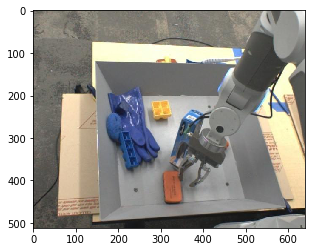

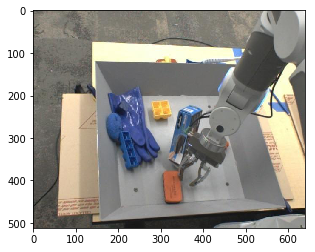

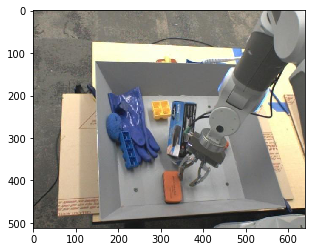

In [47]:
img1 = Image.open('/media/yi/DATA/data-orig/robot/1/5/0.jpg').convert('RGB')
img1 = np.array(img1)/255.0
img = Image.open('/media/yi/DATA/data-orig/robot/1/5/1.jpg').convert('RGB')
img2 = np.array(img)/255.0
img = Image.open('/media/yi/DATA/data-orig/robot/1/5/2.jpg').convert('RGB')
img3 = np.array(img)/255.0
plt.figure()
plt.imshow(img1)
plt.figure()
plt.imshow(img2)
plt.figure()
plt.imshow(img3)

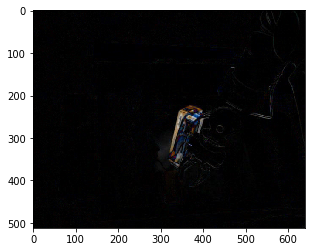

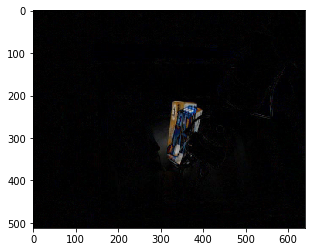

In [48]:
plt.figure()
plt.imshow(np.abs(img2 - img1))
plt.figure()
plt.imshow(np.abs(img3 - img2))

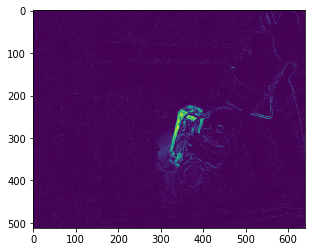

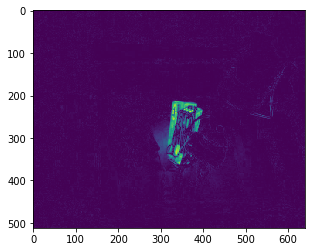

In [49]:
plt.figure()
plt.imshow(np.abs(img2[:, :, 0] - img1[:, :, 0]))
plt.figure()
plt.imshow(np.abs(img3[:, :, 0] - img2[:, :, 0]))

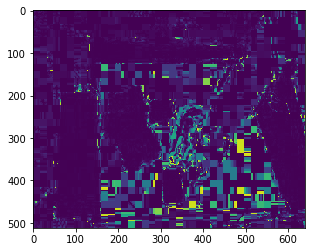

In [50]:
# This plot suggest that converts to HSV space does not change the difference, we need more sophisticated method
img1 = Image.open('/media/yi/DATA/data-orig/robot/1/5/0.jpg').convert('HSV')
img1 = np.array(img1)/255.0
img2 = Image.open('/media/yi/DATA/data-orig/robot/1/5/1.jpg').convert('HSV')
img2 = np.array(img2)/255.0
plt.imshow(np.abs(img2[:, :, 0] - img1[:, :, 0]))

0.690196078431
0.717647058824


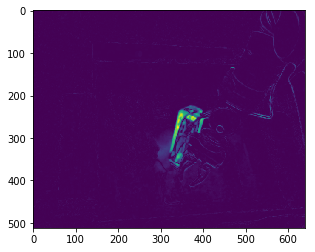

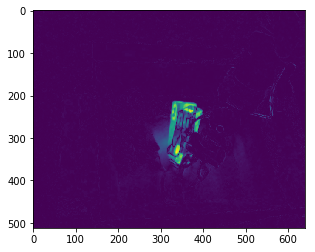

In [51]:
# After median fitlering the difference look better, but still exists, we need more sophisticated method
img1 = Image.open('/media/yi/DATA/data-orig/robot/1/5/0.jpg').convert('RGB')
img1 = np.array(img1)/255.0
img1 = ndimage.median_filter(img1, 5)
img2 = Image.open('/media/yi/DATA/data-orig/robot/1/5/1.jpg').convert('RGB')
img2 = np.array(img2)/255.0
img2 = ndimage.median_filter(img2, 5)
img3 = Image.open('/media/yi/DATA/data-orig/robot/1/5/2.jpg').convert('RGB')
img3 = np.array(img3)/255.0
img3 = ndimage.median_filter(img3, 5)
plt.figure()
plt.imshow(np.abs(img2[:, :, 0] - img1[:, :, 0]))
print(np.abs(img2 - img1).max())
plt.figure()
plt.imshow(np.abs(img3[:, :, 0] - img2[:, :, 0]))
print(np.abs(img3 - img2).max())

0.807843137255


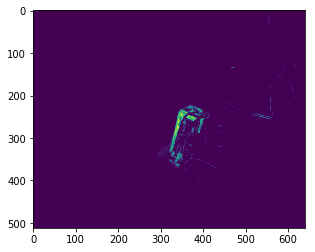

In [52]:
max_epsilon = 20 / 255.0
img1 = Image.open('/media/yi/DATA/data-orig/robot/1/5/0.jpg').convert('RGB')
img1 = np.array(img1)/255.0
img2 = Image.open('/media/yi/DATA/data-orig/robot/1/5/1.jpg').convert('RGB')
img2 = np.array(img2)/255.0
img3 = Image.open('/media/yi/DATA/data-orig/robot/1/5/2.jpg').convert('RGB')
img3 = np.array(img3)/255.0
epsilon = np.minimum(np.maximum(img2 - img1, -max_epsilon), max_epsilon)
img1_n = img1 + epsilon
plt.imshow(np.abs(img2[:, :, 0] - img1_n[:, :, 0]))
print(np.abs(img2 - img1).max())

In [53]:
img2 - img1_n

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,

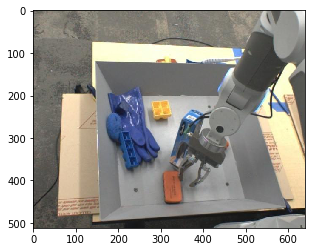

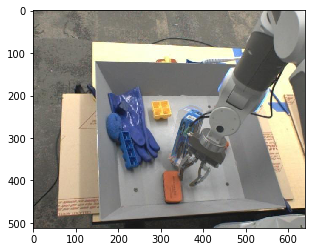

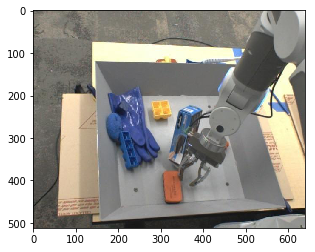

In [55]:
plt.figure()
plt.imshow(img1)
plt.figure()
plt.imshow(img1_n)
plt.figure()
plt.imshow(img2)

0.807843137255


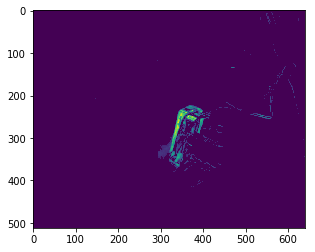

In [59]:
max_epsilon = 20 / 255.0
img1 = Image.open('/media/yi/DATA/data-orig/robot/1/5/0.jpg').convert('RGB')
img1 = np.array(img1)/255.0
img2 = Image.open('/media/yi/DATA/data-orig/robot/1/5/1.jpg').convert('RGB')
img2 = np.array(img2)/255.0
img3 = Image.open('/media/yi/DATA/data-orig/robot/1/5/2.jpg').convert('RGB')
img3 = np.array(img3)/255.0
epsilon = img2 - img1
epsilon[np.abs(epsilon) > max_epsilon] = 0
img1_n = img1 + epsilon
plt.imshow(np.abs(img2[:, :, 0] - img1_n[:, :, 0]))
print(np.abs(img2 - img1).max())